In [1]:
import numpy as np
import pandas as pd
from scipy import io

In [2]:
# Load data
y_tr = pd.read_csv("../data/tox21_labels_train.csv.gz", index_col=0, compression="gzip")
x_tr_dense = pd.read_csv("../data/tox21_dense_train.csv.gz", index_col=0, compression="gzip")
x_tr_sparse = io.mmread("../data/tox21_sparse_train.mtx.gz").tocsc()

y_te = pd.read_csv("../data/tox21_labels_test.csv.gz", index_col=0, compression="gzip")
x_te_dense = pd.read_csv("../data/tox21_dense_test.csv.gz", index_col=0, compression="gzip")
x_te_sparse = io.mmread("../data/tox21_sparse_test.mtx.gz").tocsc()

In [3]:
# show the shape of the first row of the dense matrix
x_tr_dense.iloc[0].shape


(801,)

In [4]:
# show the name of the first row of the dense matrix
x_tr_dense.iloc[0].name

'NCGC00178831-03'

In [5]:
# get the SMILES of the first row of the dense matrix
import requests

compound_id = "NCGC00178831-03"
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{compound_id}/property/IsomericSMILES/TXT"

response = requests.get(url)
if response.status_code == 200:
    smiles = response.text.strip()
    print(f"SMILES for {compound_id}: {smiles}")
else:
    print(f"Error retrieving SMILES for {compound_id}")

SMILES for NCGC00178831-03: C[N+]1=C2C=C(C=CC2=CC3=C1C=C(C=C3)N)N.C1=CC(=CC2=NC3=C(C=CC(=C3)N)C=C21)N.[Cl-]


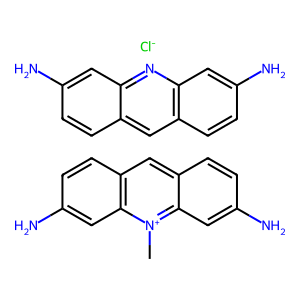

In [8]:
# draw the molecule
from rdkit import Chem
from rdkit.Chem import Draw


molecule = Chem.MolFromSmiles(smiles)
Draw.MolToImage(molecule)

In [ ]:
import sqlite3

# Create or connect to a database
conn = sqlite3.connect('chem.db')
cursor = conn.cursor()


conn.close()

In [11]:
import requests
from rdkit import Chem
from rdkit.Chem import Draw
import time

def get_smiles(compound_id):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{compound_id}/property/IsomericSMILES/TXT"
    response = requests.get(url)
    if response.status_code == 200:
        return response.text.strip()
    else:
        return None

# Create a new column 'SMILES' in x_tr_dense
x_tr_dense['SMILES'] = ''

# Fetch SMILES for each compound
for idx, compound_id in enumerate(x_tr_dense.index):
    smiles = get_smiles(compound_id)
    x_tr_dense.at[compound_id, 'SMILES'] = smiles
    print(f"Retrieved SMILES for {compound_id}: {smiles}")
    
x_tr_dense.to_csv("x_tr_smiles.csv.gz", compression="gzip")

Retrieved SMILES for NCGC00178831-03: C[N+]1=C2C=C(C=CC2=CC3=C1C=C(C=C3)N)N.C1=CC(=CC2=NC3=C(C=CC(=C3)N)C=C21)N.[Cl-]
Retrieved SMILES for NCGC00166114-03: None
Retrieved SMILES for NCGC00263563-01: C[C@H]1C[C@H]([C@@](O[C@@H]1[C@H]2C[C@@H]([C@@H](O2)[C@@]3(CC[C@@H](O3)[C@@]4(CC[C@@]5(O4)C[C@@H]([C@H]([C@H](O5)[C@@H](C)[C@H]6[C@@H]([C@H]([C@@H]([C@](O6)(CC(=O)[O-])O)C)OC)OC)C)O)C)C)OC7C[C@@H]([C@H]([C@@H](O7)C)OC)OC)(C)O)C.[NH4+]
Retrieved SMILES for NCGC00013058-02: CN(C)C1=CC=C(C=C1)C(=C2C=CC(=[N+](C)C)C=C2)C3=CC=CC=C3.CN(C)C1=CC=C(C=C1)C(=C2C=CC(=[N+](C)C)C=C2)C3=CC=CC=C3.C(=O)(C(=O)O)O.C(=O)(C(=O)[O-])O.C(=O)(C(=O)[O-])O
Retrieved SMILES for NCGC00167516-01: CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](CC2=CNC3=CC=CC=C32)NC(=O)[C@H](CC4=CC=C(C=C4)O)NC(=O)[C@H](CO)NC(=O)[C@H](CC5=CNC6=CC=CC=C65)NC(=O)[C@H](CC7=CN=CN7)NC(=O)[C@@H]8CCC(=O)N8
CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](CC2=CNC3=CC=CC=C32)NC(=O)[C@H](CC4=CC=C(C=

In [12]:
x_tr_dense.head()

,AW,AWeight,Arto,BertzCT,Chi0,Chi1,Chi10,Chi2,Chi3,Chi3c,...,W3DH,WNSA1,WNSA2,WNSA3,WPSA1,WPSA2,WPSA3,grav,rygr,SMILES
NCGC00178831-03,5.436720e+07,13.053,2.176,3.194,23.112,15.868,1.496,15.127,12.592,2.619,...,9241.018,115.371,-915.496,-39.983,290.078,2301.941,59.492,88.147,3.708,C[N+]1=C2C=C(C=CC2=CC3=C1C=C(C=C3)N)N.C1=CC(=C...
NCGC00166114-03,1.268818e+07,22.123,2.065,3.137,21.033,13.718,1.937,13.187,11.951,2.502,...,3234.199,194.740,-1029.609,-34.205,235.360,1244.323,82.906,134.852,4.131,None
NCGC00263563-01,3.076932e+06,13.085,2.154,3.207,46.896,29.958,3.806,30.105,25.569,7.819,...,76582.899,238.004,-4358.946,-106.537,868.685,15909.444,135.335,216.852,5.075,C[C@H]1C[C@H]([C@@](O[C@@H]1[C@H]2C[C@@H]([C@@...
NCGC00013058-02,7.168569e+07,12.832,2.029,3.380,51.086,32.045,1.806,29.090,21.603,5.222,...,50498.175,226.312,-2785.555,-61.923,763.288,9394.859,125.509,238.265,4.640,CN(C)C1=CC=C(C=C1)C(=C2C=CC(=[N+](C)C)C=C2)C3=...
NCGC00167516-01,7.989702e+06,12.936,2.124,3.573,70.295,46.402,3.604,42.132,32.570,7.002,...,163659.229,850.869,-21136.699,-367.122,1798.703,44681.209,362.168,317.901,7.845,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCN=C(N)N)NC(=...


In [14]:
loaded = pd.read_csv("../data/x_tr_smiles.csv.gz", index_col=0, compression="gzip")
loaded.head()

,AW,AWeight,Arto,BertzCT,Chi0,Chi1,Chi10,Chi2,Chi3,Chi3c,...,W3DH,WNSA1,WNSA2,WNSA3,WPSA1,WPSA2,WPSA3,grav,rygr,SMILES
NCGC00178831-03,5.436720e+07,13.053,2.176,3.194,23.112,15.868,1.496,15.127,12.592,2.619,...,9241.018,115.371,-915.496,-39.983,290.078,2301.941,59.492,88.147,3.708,C[N+]1=C2C=C(C=CC2=CC3=C1C=C(C=C3)N)N.C1=CC(=C...
NCGC00166114-03,1.268818e+07,22.123,2.065,3.137,21.033,13.718,1.937,13.187,11.951,2.502,...,3234.199,194.740,-1029.609,-34.205,235.360,1244.323,82.906,134.852,4.131,NaN
NCGC00263563-01,3.076932e+06,13.085,2.154,3.207,46.896,29.958,3.806,30.105,25.569,7.819,...,76582.899,238.004,-4358.946,-106.537,868.685,15909.444,135.335,216.852,5.075,C[C@H]1C[C@H]([C@@](O[C@@H]1[C@H]2C[C@@H]([C@@...
NCGC00013058-02,7.168569e+07,12.832,2.029,3.380,51.086,32.045,1.806,29.090,21.603,5.222,...,50498.175,226.312,-2785.555,-61.923,763.288,9394.859,125.509,238.265,4.640,CN(C)C1=CC=C(C=C1)C(=C2C=CC(=[N+](C)C)C=C2)C3=...
NCGC00167516-01,7.989702e+06,12.936,2.124,3.573,70.295,46.402,3.604,42.132,32.570,7.002,...,163659.229,850.869,-21136.699,-367.122,1798.703,44681.209,362.168,317.901,7.845,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCN=C(N)N)NC(=...


The y frames: 
for each of the 12 output features, theres' 11 NaNs and one binary label